<a href="https://colab.research.google.com/github/ljtaylor99/AAI-510-Final-Project/blob/main/AAI510_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAI 510 Final Project

Lauren Taylor, Jester Ugalde, Xavier Plasencia

## Problem Statement

For businesses, online review sites such as Yelp provide valuable input on customer's experiences. Because of this, monitoring those comments are vital for ensuring a business' success.

However, this can become more difficult if there is a high volume of reviews being posted. To address this problem we are going to utilize Natural Language Processing (NLP).

The goal of this project is to summarize common concerns from a corpus of review text. We intend to accomplish this goal through sentiment analysis and the extraction of N-grams.

The desired outcome is to provide an efficient and automated tool that entrepreneurs can use to manage and improve their businesses.

#### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
from collections import Counter
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk import ngrams
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

#### Reading json

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Click on Mount Drive to connect to Google Drive
# Navigate to json file from dataset and replace file path
df = pd.read_json('/content/drive/MyDrive/Copy of yelp_academic_dataset_review.json',nrows = 2000000,lines=True)
df.head(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


#### Basic EDA

In [4]:
# Data frame columns
df.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [5]:
# Null values by column
df.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [6]:
# Descriptive statistics
df.describe(include='all')

<ipython-input-6-5ff7d67b3f6b>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
count,2000000,2000000,2000000,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2000000,2000000
unique,2000000,895930,45055,NaN,NaN,NaN,NaN,1996202,1991307
top,KU_O5udG6zpxOg-VcAEodg,_BcWyKQL16ndpBdggh2kNA,VQcCL9PiNL_wkGf-uF3fjg,NaN,NaN,NaN,NaN,DO NOT PARK HERE!\nthey are too quick to boot ...,2019-05-08 23:38:13
freq,1,894,4706,NaN,NaN,NaN,NaN,6,4
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-03-01 16:57:17
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-19 19:47:59
mean,NaN,NaN,NaN,3.766570e+00,1.145340e+00,3.195710e-01,4.794245e-01,NaN,NaN
std,NaN,NaN,NaN,1.462870e+00,2.909354e+00,1.641546e+00,1.925800e+00,NaN,NaN
min,NaN,NaN,NaN,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
25%,NaN,NaN,NaN,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN


In [7]:
# Value counts for different businesses
df['business_id'].value_counts()

VQcCL9PiNL_wkGf-uF3fjg    4706
GBTPC53ZrG1ZBY3DT8Mbcw    4661
_C7QiQQc47AOEv4PE3Kong    4440
qb28j-FNX1_6xm7u372TZA    3561
DcBLYSvOuWcNReolRVr12A    3217
                          ... 
0U5d1K0p0u9e_NmX7U3FUA       1
qKjOn_PJQIudpQpoolB0bw       1
dGLx7Ls5DQtlG0sLcZ0DZQ       1
6BJ4LYa42I-gBz9IhhidYg       1
AFU5ZlFCYA0_Eqw5MlqJOg       1
Name: business_id, Length: 45055, dtype: int64

In [8]:
# Value counts of stars
df['stars'].value_counts()

5    924989
4    425651
1    293571
3    200443
2    155346
Name: stars, dtype: int64

<Axes: title={'center': 'Distribution of Star Ratings'}, xlabel='Number of Stars', ylabel='Count'>

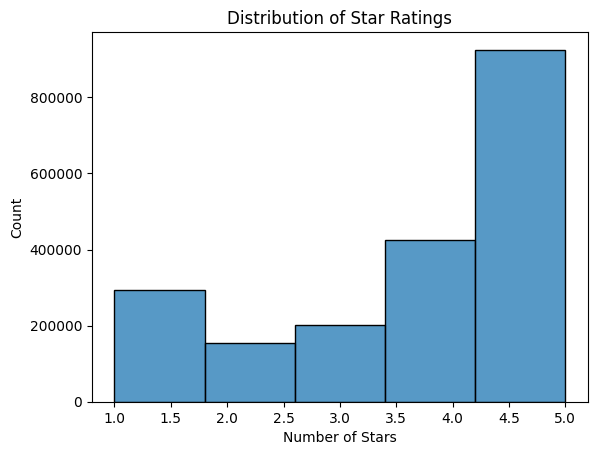

In [9]:
# Plot distribution of stars
plt.xlabel('Number of Stars')
plt.title('Distribution of Star Ratings')
sns.histplot(df['stars'],bins = 5)

## Data Prep/Engineering

In [10]:
# Use reviews from one business
df_b1 = df[df['business_id']=='VQcCL9PiNL_wkGf-uF3fjg']
len(df_b1)

4706

<Axes: title={'center': 'Distribution of Star Ratings'}, xlabel='Number of Stars', ylabel='Count'>

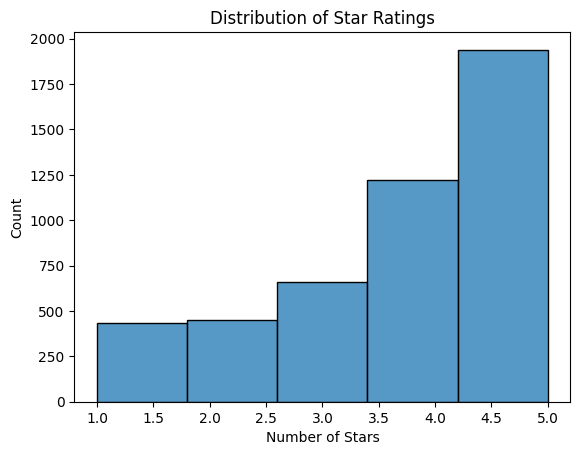

In [11]:
# Plot distribution of stars for business
plt.xlabel('Number of Stars')
plt.title('Distribution of Star Ratings')
sns.histplot(df_b1['stars'],bins = 5)

In [12]:
# Tokenize sentences
sentences = df_b1['text'].apply(nltk.sent_tokenize)
# Reset index
sentences.reset_index(inplace = True,drop = True)
sentences1 = []
# Combine sentences into 1 list
for r in sentences:
  for s in r:
    sentences1.append(s)

# Print sentences for first review
sentences[0]

['We waited about five minutes to get seated for the group of five, and we were seated upstairs.',
 'Our server was really friendly and gave us a quick rundown of the menu, and we got the crawfish beignet as an appetizer from the checking on Yelp.',
 "Apparently the appetizer isn't free like the Yelp check-in says but it's -$10 for whatever appetizer you get.",
 'Anyway, we ordered a bunch of food including two platters of oysters, and we then we started waiting.',
 'And waiting.',
 'After maybe twenty minutes, our first platter of oysters came, closely followed by the second plate.',
 "We noticed the second plate wasn't what we ordered so we asked the waiter who took it back.",
 'We then waited for another twenty or thirty minutes for our food, and our entrees came.',
 'Our oysters never did.',
 'We told the waiter and he said there was a mixup and our oysters were given to the table next to us.',
 "The manager came by afterward and told us that she'd give us two orders of what we got

In [13]:
# Tokenize words
words = df_b1['text'].apply(nltk.word_tokenize)
# Reset index
words.reset_index(inplace = True,drop = True)

In [14]:
# combine the lists of words into one list
words1 = []
for i in words:
  for j in i:
    words1.append(j)


In [15]:
word_freq = FreqDist(words1)
# Print 20 most common words
word_freq.most_common(20)

[('.', 26550),
 ('the', 18604),
 ('and', 14863),
 (',', 12575),
 ('was', 11814),
 ('a', 8825),
 ('I', 8674),
 ('to', 7591),
 ('!', 6524),
 ('of', 5675),
 ('The', 4670),
 ('it', 4550),
 ('were', 4443),
 ('in', 4372),
 ('for', 4330),
 ('we', 3819),
 ('had', 3700),
 ('but', 3221),
 ('with', 3058),
 ('We', 2983)]

In [16]:
# Remove punctuation
no_p = []
for i in words1:
  if i.isalpha():
    no_p.append(i.lower())

# Remove stopwords
stop_words = stopwords.words('english')
no_s = []
for j in no_p:
  if j not in stop_words:
    no_s.append(j)

In [17]:
# Word frequency of clean data
word_freq = FreqDist(no_s)

# Top 20 words
word_freq.most_common(20)

[('food', 3316),
 ('oysters', 3026),
 ('good', 2719),
 ('great', 2486),
 ('service', 2014),
 ('shrimp', 1758),
 ('place', 1725),
 ('new', 1468),
 ('orleans', 1354),
 ('ordered', 1303),
 ('us', 1296),
 ('would', 1265),
 ('crab', 1161),
 ('royal', 1095),
 ('got', 1076),
 ('back', 1076),
 ('time', 1076),
 ('like', 1047),
 ('came', 1037),
 ('best', 999)]

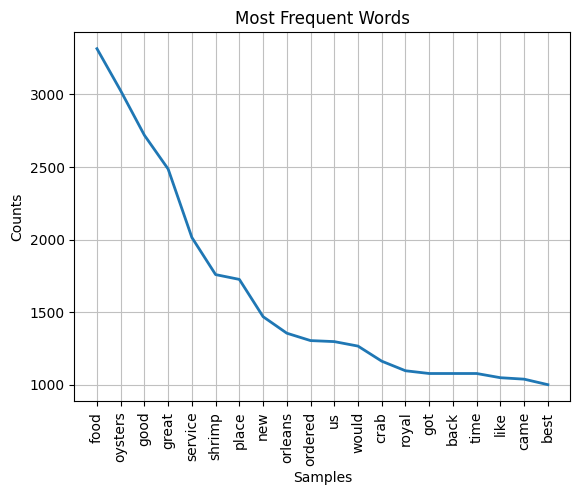

<Axes: title={'center': 'Most Frequent Words'}, xlabel='Samples', ylabel='Counts'>

In [18]:
# Plot word frequency
plt.title('Most Frequent Words')
word_freq.plot(20)

In [19]:
# See contexts in which common words appear
from nltk.text import Text
corpus = Text(no_p)
corpus.concordance('service')

Displaying 25 of 2014 matches:
sitting at the bar downstairs or up service is very attentive and food is every
fter use the free appetizers coupon service was very good this place was delici
verly salty good ambience and great service we had friends recommend that we go
r great ambience and energy and the service was personalized and prompt food wa
 server tina was the best excellent service french onion soup was great the cha
 pretty fantastic as well very slow service it took us minutes just to get a wa
arted this restaurant has the worst service of any restaurant i have ever been 
d the banana foster with cheesecake service was not that great we were initiall
 you do get much of special attn on service side i think is being generous here
ou can do better in that area great service and staff food was fun ate a lot of
nd we were seated by the window the service was spectacular however we were les
 spent almost our whole night there service was just that slow would never come
first and

## Sentiment Analysis

In [20]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Analyze the sentiment of text, return the comments as lists of positive and negative sentences
# Input is list of sentences
def get_sentiment(txt):
  sia = SentimentIntensityAnalyzer()
  pos_com = []
  neg_com = []
  for s in txt:
      # Get sentiment of sentence
      sent_ = sia.polarity_scores(s)
      if sent_['compound'] > .6:
        pos_com.append(s)
      elif sent_['compound'] < -.6:
        neg_com.append(s)

  return(pos_com,neg_com)



## Evaluation

In [21]:
# Run function
gs = get_sentiment(sentences1)
# First 20 positive comments
gs[0][0:20]

['Nice spicy flavor and a good amount of crawfish, both fried bits on top and in the sauce.',
 'Our food was cold our wonderful waitress Sydney came back have it heated for us  And she stood there to make sure that we try that that it would be hot.',
 'Use the free appetizers coupon.. Service was very good.',
 'The crab fingers appetizer was fabulous!!!',
 "It's like $10 and you don't even know how good.",
 'Good ambience and great service.',
 'We had friends recommend that we go to the Royal House on a recent trip to NOLA.',
 'He suggested the best oysters we had ever had!',
 'Chris was so great that we came back everyday on our trip to sit at the bar and have oysters and drinks.',
 'For appetizers, grilled oysters were awesome.',
 'Great ambience and energy and the service was personalized and prompt.',
 'Our server Tina was the best.',
 'Excellent service!',
 'French onion soup was great.',
 'The chargrilled oysters are on the small side compared to dragos which are big and great.',

In [22]:
# First 20 negative comments
gs[1][0:20]

['Creole shrimp was bomb, gator bites on point and the crawfish ravioli was to die for.',
 'We wanted to order for a while then magically as I type this for you our waitress appears and we order the "taste of New Orleans" and the "Po Boi" also stuffed mushrooms to get started!!!!',
 'This restaurant has the worst service of any restaurant I have ever been to in NOLA.',
 ':( I had the Alaskan Snow Crab which was either overcooked or not fresh because the meat was stuck on the shells, some parts of it were cold, too.',
 'But the crab claw appetizer was to die for.',
 'It was one of the worst places I have ever eaten in my entire life.',
 'The pear martini was made with the Worst tasting ingredients of all time and so much melon liquor that is all I could taste.',
 'The bloody mary I am told was just as bad and overly salty.',
 'I am one to tip very well when warranted,  if you are a good server and even if you are having a bad day and I can tell I still  tip well but if you give it no ef

### There's some misclassification. The classifier seems to misunderstand slang, falsely classifying phrases like 'the bomb' or 'to die for' as negative.

In [23]:
# Take closer look at misclassifed sentence
sia = SentimentIntensityAnalyzer()
sia.polarity_scores('The crab claws all the way to the French onion soup are to die for!!!!!!!!!!!',)

{'neg': 0.266, 'neu': 0.734, 'pos': 0.0, 'compound': -0.7243}

### In order to validate the sentiment of comments we are going to incorporate information about the star rating.

In [24]:
# Find metrics for performance False positive/negatives?

In [25]:
def validate_sentiment(df):
  val_score = []
  sia = SentimentIntensityAnalyzer()
  for i, j in df.iterrows():
    pol_score = sia.polarity_scores(df['text'][i])
    # False Negative - Star is positive
    if pol_score['compound'] < -0.6 and df['stars'][i] >= 4:
      val_score.append('Positive')
    # True Negative - Star and Review Negative
    elif pol_score['compound'] < -0.6 and df['stars'][i] <= 2:
      val_score.append('Negative')
    # True Neutral
    elif (-0.6 > pol_score['compound'] < 0.6) and (2 > df['stars'][i] < 4):
      val_score.append('Neutral')
    # False Positive
    elif pol_score['compound'] > 0.6 and df['stars'][i] >= 2:
      val_score.append('Negative')
    # True Positive
    elif pol_score['compound'] > 0.6 and df['stars'][i] >= 4:
      val_score.append('Positive')
    # Regular Sentiment
    elif pol_score['compound'] < -0.6:
      val_score.append('Negative')
    elif (-0.6 > pol_score['compound'] < 0.6):
      val_score.append('Neutral')
    elif pol_score['compound'] > 0.6:
      val_score.append('Positive')
    df['True Sentiment'] = val_score
    return df


## Final Model

#### Turning all the code into a class to deploy giving us top N positive and negative N-Grams

In [127]:
class top_neg_pos_reviews:
  # initializing some parameters
  def __init__(self, num_reviews, n_grams, x_num_grams, top_x_rev):
    self.num_reviews = num_reviews
    self.n_grams = n_grams
    self.x_num_grams = x_num_grams
    self.top_x_rev = top_x_rev

  # tokenize words into list of all texts
  def tokenize_to_list(self, df):
    # Tokenize words
    tok_words = df['text'].apply(nltk.word_tokenize)
    # Reset index
    tok_words.reset_index(inplace = True,drop = True)
    # combine the lists of words into one list
    words = []
    for i in tok_words:
      for j in i:
        words.append(j)
    return words

  #remove punctuation and stop words
  def remove_punc_and_stop(self, list_of_words):
    no_punct = []
    for i in list_of_words:
      if i.isalpha():
        no_punct.append(i.lower())

    # Remove stopwords
    stop_words = stopwords.words('english')
    no_stop = []
    for j in no_punct:
      if j not in stop_words:
        no_stop.append(j)
    return no_stop

  # get sentiment of sentence
  def sentiment(self, df):
    comp_score = []
    val_score = []
    sia = SentimentIntensityAnalyzer()
    for i, j in df.iterrows():
      pol_score = sia.polarity_scores(df['text'][i])
      # True Negative - Star and Review Negative
      if (pol_score['compound'] <= -0.6) and (df['stars'][i] <= 2):
        val_score.append('Negative')
        comp_score.append(pol_score['compound'])
      # True Neutral
      elif (-0.6 > pol_score['compound'] <= 0.6) and (2 > df['stars'][i] < 4):
        val_score.append('Neutral')
        comp_score.append(pol_score['compound'])
      # True Positive
      elif (pol_score['compound'] >= 0.6) and (df['stars'][i] >= 4):
        val_score.append('Positive')
        comp_score.append(pol_score['compound'])
      # False Positive
      elif (pol_score['compound'] >= 0.6) and (df['stars'][i] >= 2):
        val_score.append('Negative')
        comp_score.append(pol_score['compound'])
      # False Negative - Star is positive
      elif (pol_score['compound'] <= -0.6) and (df['stars'][i] >= 4):
        val_score.append('Positive')
        comp_score.append(pol_score['compound'])
      # Regular Sentiment
      elif pol_score['compound'] <= -0.6:
        val_score.append('Negative')
        comp_score.append(pol_score['compound'])
      elif pol_score['compound'] >= 0.6:
        val_score.append('Positive')
        comp_score.append(pol_score['compound'])
      else:
        val_score.append('Neutral')
        comp_score.append(pol_score['compound'])
    df['True Sentiment'] = val_score
    df['compound_score'] = comp_score
    return df

  # get N_gram from data
  def n_gram(self, df):
      # Tokenizing using function above
      if 'text' in df.columns:
        words = self.tokenize_to_list(df)
      else:
        print('DataFrame must have \'text\' column')
      # Removing punctuation and stop words using function above
      no_p_no_s = self.remove_punc_and_stop(words)
      # Creating Positive Review Corpus
      corpus = Text(no_p_no_s)
      ngram_counts = Counter(ngrams(corpus, self.n_grams))
      return ngram_counts.most_common(self.num_reviews)

  def get_tuple_str(self, tup_string):
    joined_str = '|'.join(tup_string)
    return joined_str

  def get_reviews(self, input_df, review_type):
    # Calling sentiment on dataframe
    df = self.sentiment(input_df.reset_index(drop=True))
    # Subsetting df based on Positive Reviews
    if review_type == 'Positive':
      df_pos = df[df['True Sentiment'] == 'Positive'].reset_index(drop=True)
      pos_n_gram = self.n_gram(df_pos)
      # Calling n_gram to create corpus and get top n reviews
      print('Top ' + str(self.num_reviews) + ' ' + str(review_type) +
            ' for ' + str(self.n_grams) + '-grams:\n')
      # Printing out n-grams with freq values
      for x in pos_n_gram:
        print(str(x) + '\n')
      # Looping through number of n-grams to print out
      for i in range(self.x_num_grams):
        df_pos_n_gram = df_pos[df_pos['text'].str.contains(self.get_tuple_str(pos_n_gram[i][0]))]
        # Getting number of top reviews that contains each n-gram
        top_x_idx = df_pos_n_gram.nlargest(n=self.top_x_rev, columns=['compound_score'])
        # Printing out reviews
        for m, n in top_x_idx.iterrows():
          print('Review #' + str(m + 1) + ' for number ' + str(i+1) + ' ' + str(self.n_grams) + '-grams:\n')
          print(top_x_idx['text'][m] + '\n')
    # Subsetting df based on Negative Reviews
    elif review_type == 'Negative':
      df_neg = df[df['True Sentiment'] == 'Negative'].reset_index(drop=True)
      neg_n_gram = self.n_gram(df_neg)
      print('Top ' + str(self.num_reviews) + ' ' + str(review_type) +
            ' for ' + str(self.n_grams) + '-grams:\n')
      for x in self.n_gram(df_neg):
        print(str(x) + '\n')
      for i in range(self.x_num_grams):
        df_neg_n_gram = df_neg[df_neg['text'].str.contains(self.get_tuple_str(neg_n_gram[i][0]))]
        top_x_idx = df_neg_n_gram.nlargest(n=self.top_x_rev, columns=['compound_score'])
        for m, n in top_x_idx.iterrows():
          print('Review #' + str(m + 1) + ' for number ' + str(i+1) + ' ' + str(self.n_grams) + '-grams:\n')
          print(top_x_idx['text'][m] + '\n')
    # Subsetting df based on Neutral Reviews
    elif review_type == 'Neutral':
      df_neu = df[df['True Sentiment'] == 'Neutral'].reset_index(drop=True)
      neu_n_gram = self.n_gram(df_neu)
      print('Top ' + str(self.num_reviews) + ' ' + str(review_type) +
            ' for ' + str(self.n_grams) + '-grams:\n')
      for x in self.n_gram(df_neu):
        print(str(x) + '\n')
      for i in range(self.x_num_grams):
        df_neu_n_gram = df_neu[df_neu['text'].str.contains(self.get_tuple_str(neu_n_gram[i][0]))]
        top_x_idx = df_neu_n_gram.nlargest(n=self.top_x_rev, columns=['compound_score'])
        for m, n in top_x_idx.iterrows():
          print('Review #' + str(m + 1) + ' for number ' + str(i+1) + ' ' + str(self.n_grams) + '-grams:\n')
          print(top_x_idx['text'][m] + '\n')

In [128]:
top_review = top_neg_pos_reviews(num_reviews=10, n_grams=3, x_num_grams=3, top_x_rev=3)
top_review.get_reviews(df_b1, review_type='Positive')


Top 10 Positive for 3-grams:

(('taste', 'new', 'orleans'), 240)

(('french', 'onion', 'soup'), 109)

(('crab', 'claw', 'appetizer'), 62)

(('red', 'beans', 'rice'), 61)

(('crab', 'claws', 'appetizer'), 52)

(('shrimp', 'po', 'boy'), 50)

(('oysters', 'half', 'shell'), 50)

(('food', 'great', 'service'), 45)

(('time', 'new', 'orleans'), 44)

(('ordered', 'taste', 'new'), 42)

Review #2825 for number 1 3-grams:

This place tastes and serves so well. Can't hate.

Although some other reviewers placed this as a tourist trap, I'm actually more than happy to admit I would come here again.

Location and setup : It was a little bit of a walk but about 0.1 mi from our hotel. This is a hilarious distance for me but for my parents aged 5x, hungry, and after a long day of exploring the Mississippi River they were a little against walking far. Mom, why did you try to wear heeled sandals? I know it's a trend but they're not going to make you anywhere close to 5' 1". Anyhow I digress, it's close to

In [129]:
# Trying on negative reviews
top_review.get_reviews(df_b1, review_type='Negative')

Top 10 Negative for 3-grams:

(('taste', 'new', 'orleans'), 73)

(('french', 'onion', 'soup'), 49)

(('shrimp', 'po', 'boy'), 28)

(('would', 'come', 'back'), 17)

(('blackened', 'shrimp', 'jambalaya'), 17)

(('new', 'orleans', 'sampler'), 15)

(('ordered', 'taste', 'new'), 15)

(('red', 'beans', 'rice'), 13)

(('ordered', 'shrimp', 'grits'), 11)

(('get', 'free', 'appetizer'), 11)

Review #407 for number 1 3-grams:

Enjoyable experience. Had to wait a bit to be seated - even at 9:30pm on a Sunday. Just walk halfway down the street and grab a drink from the lil beer and frozen drink stand and time will go a little faster while standing in line.

They sent us to be seated upstairs on the balcony. After reading y'all's reviews I was hoping for just that. The seating process seemed a bit disorganized but the upstairs hostess was nice. Place was packed. Our server (Diego maybe?) was great. Friendly and knew his menu. The bf had one of the best bloodies I have ever tried. I almost got my ow

## Discussion/Conclusion

Overall, we were able to efficiently analyze sentiment and extract relevant N-grams. One challenge that remains is how to visualize these results. For the deployment phase it is important to integrate the output of our model into a user interface. Effective visualization will increase the usability of the application, to allow for less technology-oriented users.

There are some caveats that should be considered when evaluating our model. One concern is response bias in the data. This becomes evident when plotting the distribution of star ratings. Based on the visualization, people who have positive sentiments are more likely to post reviews than those with negative ones.

Another aspect of repsonse bias that ought to be considered is the demographics of the users that post reviews. In our dataset there was no demographic information relating to customers. It is entirely possible that the population in the dataset may not represent the population as a whole.

This becomes problematic when businesses attempt to pivot business practices based on feedback. This can complicate a business' abilty to serve a diverse customer base. In order to maximize the utility of the model, analysis should be conducted, exploring the demographic makeup of Yelp users and business patrons.